In [1]:
import numpy as np 
from scipy.misc import derivative
import matplotlib.pyplot as plt
from matplotlib import ticker
from sympy import Symbol
import math

In [2]:
J=1
N=np.linspace(1,20,20) #up to 20 but no larger
h=np.linspace(-1,1,10) #inside the set [-1,1]
T=1

In [3]:
def Taylor_exp(x):
    y=1
    for i in range(21):
        y+=(x**i)/math.factorial(i)
    
    return y

def log(x):
    n = 1000.0
    return n * ((x ** (1/n)) - 1)

def my_cosh(x):
    return (Taylor_exp(x)+Taylor_exp(-x))/2

def my_sinh(x):
    return (Taylor_exp(x)-Taylor_exp(-x))/2

# Numerical Solutions

In [4]:
h_s=Symbol("h_s")

lambda_p=(Taylor_exp(J/T)*(my_cosh(h_s/T)+(my_sinh(h_s/T)**2+Taylor_exp(-4*(J/T)))**(0.5)))**N
lambda_m=(Taylor_exp(J/T)*(my_cosh(h_s/T)-(my_sinh(h_s/T)**2+Taylor_exp(-4*(J/T)))**(0.5)))**N

Z=lambda_p**N+lambda_m**N
y=log(Z)

yprime=[]
for i in range(len(y)):
    yprime.append(y[i].diff(h_s))

m=(T/N)*yprime

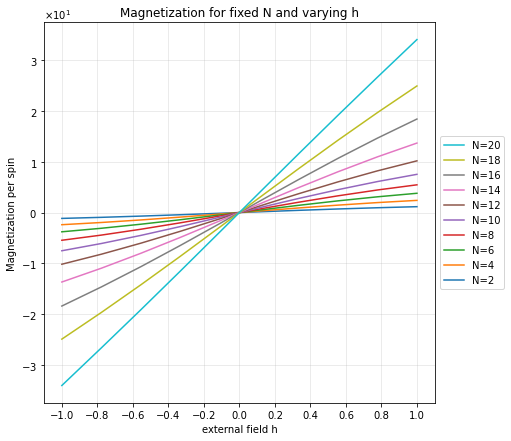

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
for j in N:
    N_h=j
    mh=[]
    for i in h:
        mh.append(float(m[int(N_h)-1].subs(h_s,float(i))))

    if j%2==0:
        plt.plot(h,mh,label="N={:.0f}".format(N_h))    

plt.title("Magnetization for fixed N and varying h")
plt.ylabel("Magnetization per spin")
plt.xlabel("external field h")
plt.xlim(-1.1,1.1)
plt.grid(alpha=0.3)
plt.xticks(np.around(np.arange(-1,1.2,step=0.2),decimals=1))


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1, 0.5))

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

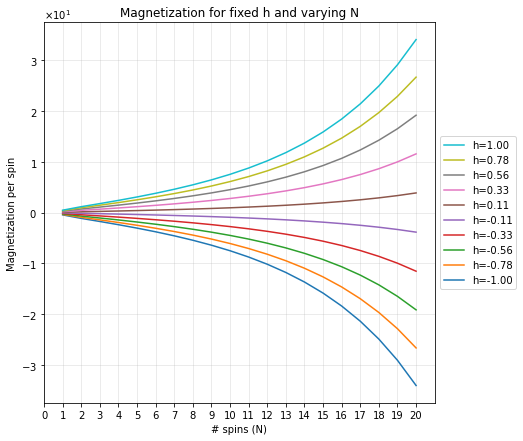

In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
for j in h:
   h_N=j
   mN=[]
   for i in N:
      mN.append(float(m[int(i)-1].subs(h_s,float(h_N)))) 
   plt.plot(N,mN,label="h={:.2f}".format(h_N))

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(0,21,step=1))
plt.xlim(0,21)
plt.xlabel("# spins (N)")
plt.ylabel("Magnetization per spin")
plt.title("Magnetization for fixed h and varying N")
plt.grid(alpha=0.3)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

# Simulation

In [46]:
np.random.randint(0, 10)

9

In [16]:
alist=[-1,1]
np.random.choice(alist,10)

array([-1,  1, -1, -1,  1,  1, -1, -1,  1,  1])

In [99]:
h_sim=0.8

In [47]:
def Hamiltonian(s):
    sum_xy=0
    for i in range(len(s)-1):
        sum_xy+=s[i]*s[i+1]
    
    interacting_term=-J*sum_xy
    extfield_term=-h_sim*sum(s)


    H_s=interacting_term+extfield_term
    return H_s

def Initialize(N):
    lattice=np.random.choice([-1,1],N)
    return lattice

#def part_func_Z(s):



#def Boltzmann_dist(s):





In [ ]:
def Mcmove(config):
    spin_to_flip=np.random.choice(config)
    

In [74]:
one_lattice=Initialize(20)

In [100]:
Hamiltonian(one_lattice)

-2.1999999999999993

In [76]:
N_p=sum([i>0 for i in one_lattice])

In [95]:
N_p=11

In [96]:
poss_config=math.factorial(20)/(math.factorial(N_p)*math.factorial(20-N_p))

In [97]:
poss_config

167960.0

In [ ]:
def initialstate(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state



def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config



def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting



def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag